<a href="https://colab.research.google.com/github/Auraofbee/python_class/blob/main/%5BFeb_2%5D_Workshop_2_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Benedicta Olotu

## XYZ Bank - Term Deposit Subscription Prediction
* You are a data scientist at XYZ Bank, tasked with helping the bank increase the success rate of its term deposit campaigns. In the previous campaigns, the bank noticed that only a small fraction of customers subscribed to term deposits, and now they want to use data science to predict which customers are likely to subscribe.

<center><img src="https://dcbtehri.co.in/wp-content/uploads/2020/05/FD1.jpg"/></center>

* You’ve been provided with a dataset that includes information about customer demographics, financial behavior, and previous campaign contact history. Your task is to evaluate different machine learning models and help the bank efficiently target potential customers for their term deposit marketing efforts.

# Step 1: Import the neccessary libraries

In [ ]:
# Import the necessary libraries(numpy, pandas, matplotlib, seaborn)
# Data manipulation and numerical operations

import numpy as np  # Manipulating matrices and vectors
import pandas as pd # Works with tabular datasets
import matplotlib.pyplot as plt # Plotting
import seaborn as sns #Another library for plotting

# Setting maximum limit of the number of columns visible
pd.set_option('display.max_columns', 30)

# sns.function-name()

# Step 2: Load the data


### The dataset contains 16 features and a target as shown below:
1. `age`: The customer's age.
2. `job`: The type of job the customer has.
3. `marital`: The marital status of the customer.
4. `education`: The customer's level of education.
5. `default`: Whether the customer has credit in default.
6. `balance`: The average yearly balance in euros.
7. `housing`: Whether the customer has a housing loan.
8. `loan`: Whether the customer has a personal loan.
9. `contact`: The type of communication contact
10. `day`: The last contact day of the month.
11. `month`: The last contact month of the year.
12. `duration`: The last contact duration in seconds.
13. `campaign`: Number of contacts performed during this campaign.
14. `pdays`: Number of days since the client was last contacted.
15. `previous`: Number of contacts before this campaign.
16. `poutcome`: Outcome of the previous marketing campaign.
17. `y`: Whether the customer subscribed to the term deposit (yes/no).


### 2.1 Load the data & view it


- `read_csv()` helps to load a csv file.
- `head()` helps to view the initial few rows of the dataset.
- `df.columns` gives the names of the columns of the dataset `df`.
- `df.shape` gives the shape (rows by columns) of the dataset `df`.
- `df.info()` gives the bsaic info about the data type columns like the null value count, dtypes.
- `df.describe()` provides a statistical summary of the dataset.

Hint: Use ; as the seperator.

In [ ]:
# Loading the data
# Read the csv file using a seperator ";"
# Replace the placeholder <> with the code to load the data - pd.read_csv('bank-full.csv', sep=';')
data = pd.read_csv('/content/bank-full.csv', sep = ';')

# csv --> Comma separated values
# Viewing the data
data.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no


### 2.2 View the columns of the data and understand them

In [ ]:
# View the columns of the dataset
# Replace the placeholder <> with the code to view the columns - data.columns
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

### 2.3 Check the shape of the dataset

In [ ]:
# Checking the shape of the data
# Replace the placeholder <> with the code to check the shape of the data - data.shape
data.shape # (rows, columns)

(45211, 17)

### 2.4 Understand the datatypes of each of the columns

In [ ]:
# Check the dataset info
# Replace the placeholder with the code to check the dtypes of the dataset columns - data.info()
data.head().dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
balance,int64
housing,object
loan,object
contact,object
day,int64


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
data.notnull().sum() # isnull() for missing values

,0
age,45211
job,45211
marital,45211
education,45211
default,45211
balance,45211
housing,45211
loan,45211
contact,45211
day,45211


> There are no missing vals in the dataset.
>

### Interpretation:
- Does all the columns of the dataset are of the same dtype?
  
  > There are varying data types.

# STEP 3: EDA



### 3.1  Check the value counts of the target variable y in the dataset

A common problem in binary classification tasks is data imbalance, where one class significantly outnumbers the other. In this question, you need to check whether the target variable y (whether the customer subscribed to a term deposit) is imbalanced in the dataset.

- `df[target_column].value_counts()` provides an idea of the unique values present in the target_column and its count.

In [ ]:
# Check the value counts in target column
# Replace the placeholder <> with the function to find the vlaue counts - value_counts()
data['y'].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
data['y'].value_counts()

,count
y,
no,39922
yes,5289


In [ ]:
data['y'].value_counts()/data.shape[0] # Skewed/Imbalanced Dataset
# Binary Classification Task

# Logistic Regression --> Linear Classifier [Baseline]
# Tree-based Ensemble Algorithms

,count
y,
no,0.883015
yes,0.116985


### Interpretation:

- Do you think the dataset suffers from class imbalance?
  

### 3.2 Why do you think class imbalnce is a problem, and list down your ideas on addressing the class imbalance?

### 3.3 For this problem what do you think is a good performance metric, precision, recall, f1-score or all of them? justify your answer.

# Step 4:  Data Preprocessing

### 4.1 Check for any duplicate rows in the dataset.

- `df.duplicated().sum()` provides the total number of duplicated values in the dataset `df`.

In [ ]:
# Check for duplicate row
# Replace the placeholder with the code to find the duplicate entries in the dataset - data.duplicated().sum()
data.duplicated().sum() # No duplicate rows

0

### Interpretation:
- Are there any duplicated entries in the dataset?
  

### 4.2 Check the Null values

- `df.isnull().sum()` provides the total number of null values in each of the columns in the dataset `df`.




In [ ]:
# Check for missing values in the dataset
# Replace the placeholder with the code to check the null values - data.isnull().sum()
data.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [ ]:
data[categorical_nominal_columns].nunique()

,0
age,77
job,12
marital,3
education,4
default,2
balance,7168
housing,2
loan,2
contact,3
day,31


In [ ]:
# data['y'] = data['y'].map({'yes':1, 'no':0})

data[['day','y']].groupby('day').sum()

,y
day,
1,90
2,182
3,178
4,230
5,215
6,181
7,157
8,201
9,179


In [ ]:
# Education -->  Ordinal --> {0, 1, 2} # coef --> 0.8
# Nominal --> {Col_0, Col_1, Col_2} --> coefs: 0.1, 0.2, 0.3 [interpretability]

### Interpretation:
- Are there any null values in the dataset?
  

In [ ]:
# Pandas --> 20 GB
# Modin, Polar, [Jax, Vaex], cudf
# Spark DataFrames

In [ ]:
# OneHot [Nominal], Ordinal  --> Numeric [Binary Split] --> Only applicable for sklearn
# Decision tree --> k-children --> if there are k-categories

### 4.3 Split the data into train and test

- `df.drop(<column to be dropped>)` helps to drop the desired columns.
- `train_test_split()` helps to split the data into training & test datasets.

In [ ]:
data.columns[:-1]

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

In [ ]:
# Assuming X and y are your features and target variable
# Split the data into 80% train and 20% test, stratifying by the target variable (y)

# Replace the placeholder <1> with the code for selecting the features - data.drop(['y'],axis=1)
# Replace the placeholder <2> with the code to select the target variable - data.y
X = data.drop(['y'], axis = 1) #features -->  data.loc[:, data.columns[:-1]]
y = data['y'] #

#sci-kit learn (sklearn)
#!pip install scikit-learn

# stratify
# 100 examples --> 80 (no), 20 (yes)
# Train [80 samples] --> 64(no) , 16 (yes)
# Test [20 samples] --> 16(no), 4(yes)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1234)

### 4.4 Seperate the numerical and catergorical columns for both train and test sets

In [ ]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
numerical_columns = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

In [ ]:
categorical_features = list((set(data.columns) -set(numerical_columns) - {'y'}))
categorical_features

['default',
 'day',
 'housing',
 'job',
 'month',
 'education',
 'marital',
 'poutcome',
 'contact',
 'loan']

In [ ]:
data.head(2)
# X1 --> ['this is random text', 'some there random text',.....] # Text Column --> NLP

# [X1] --> [['t1','t2'],['t2']]

# loan --> {yes, no}
# Categorical --> Nominal, Ordinal
# OneHotEncoding --> yes, no
# yes-->              1   0
# no-->               0   1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no


In [ ]:
X_train

In [ ]:
# Divide the dataset into numerical and categorical columns
numerical_columns = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']  # Numerical columns
categorical_columns = list(set(data.columns) - set(numerical_columns) - {'y'})  # All remaining columns except the target

# Separate numerical and categorical columns for train and test data
# Replace the placeholders <1>, <2> to select the numerical columns from the train dataset and test dataset respectively - eg. X_train[numerical_columns]
train_numerical = X_train.loc[:, numerical_columns]
test_numerical = X_test.loc[:,numerical_columns]

# Replace the placeholders <1>, <2> to select the categorical columns from the train dataset and test dataset respectively - eg. X_train[numerical_columns]
train_categorical = X_train.loc[:, categorical_columns]
test_categorical = X_test.loc[:, categorical_columns]


### 4.5 Standardize the numerical columns using StandardScaler()

In [ ]:
# Apply StandardScaler to numerical columns in train and test data
from sklearn.preprocessing import StandardScaler

# Apply StandardScaler on train data (fit and transform)
scaler = StandardScaler() # (val - mean)/std --> Zdistribution (Standard Normal Distribution --> N(0, 1))

# Replace the placeholder <> with the code to fit and transform the train - numerical data - scaler.fit_transform(train_numerical)
train_numerical_scaled = scaler.fit_transform(train_numerical)

# Apply the scaler on test data (transform only)
# Replace the placeholder <> with the code to transform the test - numerical data - scaler.transform(test_numerical)
test_numerical_scaled = scaler.transform(test_numerical)
print(train_numerical_scaled.shape, test_numerical_scaled.shape)

(36168, 6) (9043, 6)


### 4.6 Encode the categorical columns using OneHotEncoder

In [ ]:
# Import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

# Apply OneHotEncoder on train data (fit and transform)
encoder = OneHotEncoder(drop='first')
# Replace the placeholder <> with the code to fit and transform the train - categorical data - encoder.fit_transform(train_categorical)
train_categorical_encoded = encoder.fit_transform(train_categorical).toarray()

# Apply the encoder on test data (transform only)
# Replace the placeholder <> with the code to fit and transform the train - categorical data - encoder.transform(test_categorical)
test_categorical_encoded = encoder.transform(test_categorical).toarray()

print(train_categorical_encoded.shape, test_categorical_encoded.shape)

(36168, 65) (9043, 65)


In [ ]:
train_numerical_scaled[0]

array([ 0.09692825, -0.71959103, -0.60735295,  1.0586522 , -0.41086029,
       -0.29940263])

In [ ]:
train_categorical_encoded[0]

<1x65 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [ ]:
#train_numerical_scaled.shape
#train_categorical_encoded.shape
np.concatenate([train_numerical_scaled, train_categorical_encoded], axis = 1).shape

(36168, 71)

### 4.7 Combine the both numerical and categorical columns

In [ ]:
# Combine numerical and categorical columns in train and test data
train_final = np.hstack([train_numerical_scaled, train_categorical_encoded])
test_final = np.hstack([test_numerical_scaled, test_categorical_encoded])

# Convert the final train and test sets to DataFrames
X_train = pd.DataFrame(train_final, columns=numerical_columns + list(encoder.get_feature_names_out(categorical_columns)))
X_test = pd.DataFrame(test_final, columns=numerical_columns + list(encoder.get_feature_names_out(categorical_columns)))

# Check the shape of the training data
X_train.shape

(36168, 71)

### 4.8 Encode the target variable (`yes: 1` , `no: 0`)


In [ ]:
#y_train

In [ ]:
# Encode the target variable in the training set
y_train = y_train.apply(lambda x: 1 if x == 'yes' else 0)

# Encode the target variable in the test set
y_test = y_test.apply(lambda x: 1 if x == 'yes' else 0)

### 4.9 Display the shape of the train sets and test sets

In [ ]:
# Display the shape of sets
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(36168, 71) (36168,) (9043, 71) (9043,)


# Step 5: Model Building

### 5.1 Build a Logistic Regression Model

Build a Logistic regression model and check the model performance using precision, recall, F1 score, and the AUC from ROC curve with default threshold. Write your observations based on the result.

In [ ]:
# Import LogisticRegression, required metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Step 1: Train a Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=1234)
# Replace the placeholder to fit the logistic_model created - logistic_model.fit(X_train, y_train)
logistic_model.fit(X_train, y_train)

# Step 2: Predict probabilities for the test set (to calculate AUC later)
y_proba = logistic_model.predict_proba(X_test)[:, 1] # Class 1 probability scores

# Step 3: Make predictions using the default threshold (0.5)
# Replace the placeholder to predict the probabilities for the test data - logistic_model.predict(X_test)
y_pred = logistic_model.predict(X_test)

# Step 4: Calculate Precision, Recall, and F1 Score
# Replace the placeholders <1>,<2>,<3> with the code to find the precision, recall, f1_score - precision_score(y_test, y_pred),recall_score(y_test, y_pred), f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Step 5: Calculate AUC (Area Under the ROC Curve)
# Replace the placeholder <> with the code to find the roc-auc score - roc_auc_score(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

# Step 6: Print the evaluation metrics
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {roc_auc:.4f}")


Precision: 0.6721
Recall: 0.3526
F1 Score: 0.4625
AUC: 0.9118


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7985
           1       0.67      0.35      0.46      1058

    accuracy                           0.90      9043
   macro avg       0.80      0.66      0.70      9043
weighted avg       0.89      0.90      0.89      9043



In [ ]:
y_preds_new_threshold = (logistic_model.predict_proba(X_test)[:,1] > 0.4).astype(int) #(Threshold)

In [ ]:
print(classification_report(y_test, y_preds_new_threshold))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7985
           1       0.64      0.44      0.52      1058

    accuracy                           0.91      9043
   macro avg       0.78      0.70      0.74      9043
weighted avg       0.90      0.91      0.90      9043



In [ ]:
logistic_model.predict(X_train)

array([0, 0, 0, ..., 0, 0, 0])

### Interpretation:

- What do you think about the model's capability in identifying the positives?
  
- Is the AUC value high? What does that mean?


### 5.2 Build a Logistic Regression Model with Optimal Threshold


Build a logisitc model with optimal threshold and check perfomrance based on above-mentioned metrics. Mention your observations on the recall and F1-Score along with other metrics(use `class_weight` = 'balanced')

In [ ]:
# Loss Function for Logistic Regression # y_i [Actual Labels] -->  {0 [no], 1[yes]}
# Class 0 --> 100, Class 1 --> 20
# w_class1 = 120/20 = 6
# w_class_0 = 120/100 = 1.2

# min 1/n \sum_i_1_to_n  - y_i log_2(p_class_1)    - (1  - y_i) * log_2(p_class_0)
#                  --> [Loss_Class_1 samples]   - > Loss_Class_0 Samples
# min 2A + B

In [ ]:
# class_weights = {0:1, 1:2} # Give more weight to minority class
# class_weights = 'balanced'

Optimal Threshold: 0.4311
Precision with Optimal Threshold: 0.3962
Recall with Optimal Threshold: 0.8658
F1 Score with Optimal Threshold: 0.5436
AUC: 0.9149


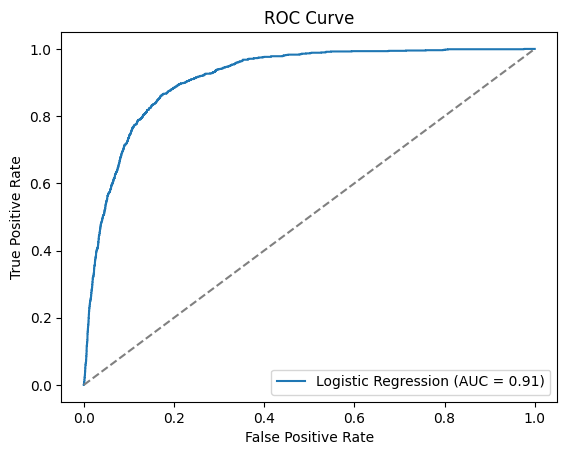

In [ ]:
# Import the required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Step 1: Train a Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=1234, class_weight='balanced')
logistic_model.fit(X_train, y_train)

# Step 2: Predict probabilities for the test set (to calculate AUC and ROC curve)
y_proba = logistic_model.predict_proba(X_test)[:, 1]

# Step 3: Compute ROC curve and find the optimal threshold
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Optimal threshold: the one that maximizes the difference between true positive rate and false positive rate
# Replace the placeholder <> with the code to find the optimal value as the difference between tpr and fpr - np.argmax(tpr - fpr)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx] # Optimal threshold
print(f"Optimal Threshold: {optimal_threshold:.4f}")

# Step 4: Make predictions using the optimal threshold
y_pred_optimal = (y_proba >= optimal_threshold).astype(int)

# Step 5: Calculate Precision, Recall, and F1 Score with the optimal threshold
precision_optimal = precision_score(y_test, y_pred_optimal)
recall_optimal = recall_score(y_test, y_pred_optimal)
f1_optimal = f1_score(y_test, y_pred_optimal)

# Step 6: Calculate AUC (Area Under the ROC Curve)
roc_auc = roc_auc_score(y_test, y_proba)

# Step 7: Print the evaluation metrics
print(f"Precision with Optimal Threshold: {precision_optimal:.4f}")
print(f"Recall with Optimal Threshold: {recall_optimal:.4f}")
print(f"F1 Score with Optimal Threshold: {f1_optimal:.4f}")
print(f"AUC: {roc_auc:.4f}")

#Step 8: Plot
# Step 5: Plot the ROC curve
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="best")
plt.show()


In [ ]:
print(classification_report(y_test, y_pred_optimal))

              precision    recall  f1-score   support

           0       0.98      0.83      0.90      7985
           1       0.40      0.87      0.54      1058

    accuracy                           0.83      9043
   macro avg       0.69      0.85      0.72      9043
weighted avg       0.91      0.83      0.85      9043



#### Interpretation:
- Is the probability threshold greater than the deafult threshold of 0.5?
  
- What do you think about the precision & recall values compared to the previous model?


### 5.3 Build a KNN Model with k=5

Build a KNN model with k=5 and check the model performance using precision, recall, F1 score, write your observations on the metrics

In [ ]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Make the train and test sets are in array format
X_train=np.array(X_train)
X_test=np.array(X_test)

# Step 1: Initialize and train the KNN model
# Replace the placeholder <1> with the code to create a knn model with k=5 -  KNeighborsClassifier(n_neighbors=5)
# Replace the placeholder <2> to fit the model - knn_model.fit(X_train, y_train)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Step 2: Predict probabilities for the test set (to calculate AUC later)
y_proba_knn = knn_model.predict_proba(X_test)[:, 1]

# Step 3: Make predictions using the default threshold (0.5)
# Replace the placeholder <> with the code to make predictions on test data - knn_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)

# Step 4: Calculate Precision, Recall, and F1 Score
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)


# Step 6: Print the evaluation metrics
print(f"Precision: {precision_knn:.4f}")
print(f"Recall: {recall_knn:.4f}")
print(f"F1 Score: {f1_knn:.4f}")


Precision: 0.5902
Recall: 0.3431
F1 Score: 0.4340


In [ ]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7985
           1       0.59      0.34      0.43      1058

    accuracy                           0.90      9043
   macro avg       0.75      0.66      0.69      9043
weighted avg       0.88      0.90      0.88      9043



### Interpretation:
- What is your observation on the metrics of this model?
  

### 5.4 Build a KNN Model with k=5 with a balanced set

#####  SMOTE the data to address class imbalance and build a KNN model with k=5 and check the model performance using precision, recall, F1 score; Compare the reuslts with the previous results and write your observations.

In [ ]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
X, y = make_classification(n_samples = 100, n_features = 2, n_informative = 2, n_redundant = 0, n_classes = 2, flip_y = 0.05, weights = {0:0.88, 1:0.12}, random_state = 1)

In [ ]:
X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(X, y, test_size = 0.3, stratify =  y,random_state = 1)

(array([0, 1]), array([61,  9]))


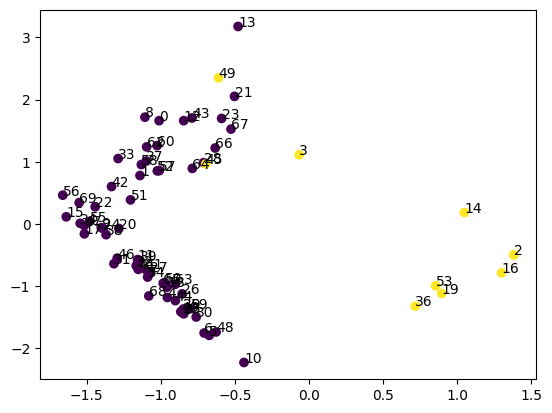

In [ ]:
print(np.unique(y_train_small, return_counts = True))
plt.scatter(X_train_small[:,0], X_train_small[:,1], c = y_train_small)
for i in range(X_train_small.shape[0]):
    plt.annotate(str(i), (X_train_small[i,0], X_train_small[i,1]))
plt.show()

In [ ]:
# SMOTE --> Synthetic Minority Oversampling TechniquE
# Increases the number of minority examples [yellow samples --> Class 1]
# Vanilla version --> You only consider the minority examples

!pip install imbalanced-learn

Before: (array([0, 1]), array([61,  9]))
Before: (array([0, 1]), array([9, 9]))


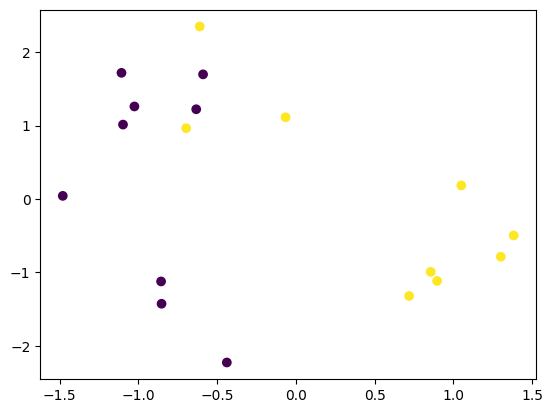

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
print("Before:", np.unique(y_train_small, return_counts = True))
rus =  RandomUnderSampler(random_state=1234, sampling_strategy = 1)
# final_Examples_in_majority_Class  => current_minority_examples (9) / sampling_strategy
X_train_rus, y_train_rus = rus.fit_resample(X_train_small, y_train_small)
print("Before:", np.unique(y_train_rus, return_counts = True))
plt.scatter(X_train_rus[:,0], X_train_rus[:,1], c = y_train_rus)

# X --> Design Matrix [With all the features] --> X_1, X_2, X_3, .....
# y --> y_1, y_2, ....

# Undersampling --> Reducing the majority examples --> Suffers from Information loss
# OverSampling --> Random Sampling with Replacement --> Might suffer from overfitting to training examples
# Mix of UnderSampling and Oversampling
# SMOTE + class_weights [From the classifier]

# Adaptive Boosting --> Gives a prob score to each example
# D1 -->  D2--> D3 -->  ...Dp

Before: (array([0, 1]), array([61,  9]))
Before: (array([0, 1]), array([61, 61]))


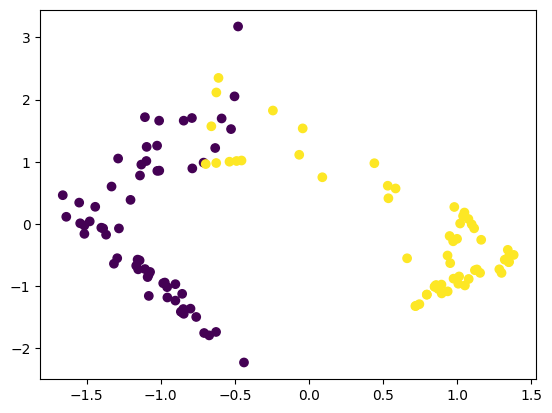

In [ ]:
from imblearn.over_sampling import SMOTE
print("Before:", np.unique(y_train_small, return_counts = True))
smote = SMOTE(random_state=1234, k_neighbors=5, sampling_strategy = 1)
# final_Examples_in_minority_Class (25) => current_majority_examples (61)  * sampling_strategy
X_train_smote, y_train_smote = smote.fit_resample(X_train_small, y_train_small)
print("Before:", np.unique(y_train_smote, return_counts = True))

plt.scatter(X_train_smote[:,0], X_train_smote[:,1], c = y_train_smote)

In [ ]:
# kd-tree, ball-tree [Approximate nearest neighbor search]
# Bio-inspired nearest-neighbor search

In [ ]:
# Import the required libraries
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

# Step 1: Apply SMOTE to the training data
smote = SMOTE(random_state=1234)

# Resample X_train and y_train
# Replace the placeholder <> with the code to apply SMOTE on training data - smote.fit_resample(X_train, y_train)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Convert the resampled data to NumPy arrays (if they are not already)
X_train_smote = np.array(X_train_smote)
X_test = np.array(X_test)

# Step 2: Initialize and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_smote, y_train_smote)

# Step 3: Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Step 4: Calculate Precision, Recall, and F1 Score
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

# Step 5: Print the evaluation metrics
print(f"Precision: {precision_knn:.4f}")
print(f"Recall: {recall_knn:.4f}")
print(f"F1 Score: {f1_knn:.4f}")


Precision: 0.4006
Recall: 0.7826
F1 Score: 0.5299


In [ ]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90      7985
           1       0.40      0.78      0.53      1058

    accuracy                           0.84      9043
   macro avg       0.68      0.81      0.72      9043
weighted avg       0.90      0.84      0.86      9043



### Interpretation:
- What do you think about the model's performance before and after applying SMOTE?
  

### 5.5 Build a Random forest model with n_estimators=10 and balanced class weight

#####  Build a Random forest with the given specifications and check the model performance using precision, recall, F1 score; Obtain the training set and test set metrics and write your observations.

In [ ]:
# Import the required libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

# Step 1: Initialize and train the Random Forest model with n_estimators=10
rf_model = RandomForestClassifier(n_estimators=10, random_state=1234, class_weight='balanced')
# Replace the placeholder <> with the code to fit the random forest classifier created - rf_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Step 2: Make predictions on the test set
y_pred_rf_test = rf_model.predict(X_test)

# Step 3: Make predictions on the training set
y_pred_rf_train = rf_model.predict(X_train)

# Step 4: Calculate Precision, Recall, and F1 Score for the test set
# Replace the placeholders <1>, <2>, <3> with the code to find the precision, recall, f1-scores of the test data
precision_rf_test = precision_score(y_test, y_pred_rf_test)
recall_rf_test = recall_score(y_test, y_pred_rf_test)
f1_rf_test = f1_score(y_test, y_pred_rf_test)

# Step 5: Calculate Precision, Recall, and F1 Score for the training set
# Replace the placeholders <1>, <2>, <3> with the code to find the precision, recall, f1-scores of the training data
precision_rf_train = precision_score(y_train, y_pred_rf_train)
recall_rf_train = recall_score(y_train, y_pred_rf_train)
f1_rf_train = f1_score(y_train, y_pred_rf_train)

# Step 6: Print the evaluation metrics for the training set
print("\nTraining Set Metrics:")
print(f"Precision: {precision_rf_train:.4f}")
print(f"Recall: {recall_rf_train:.4f}")
print(f"F1 Score: {f1_rf_train:.4f}")

# Step 7: Print the evaluation metrics for the test set
print("\nTest Set Metrics:")
print(f"Precision: {precision_rf_test:.4f}")
print(f"Recall: {recall_rf_test:.4f}")
print(f"F1 Score: {f1_rf_test:.4f}")



Training Set Metrics:
Precision: 0.9967
Recall: 0.9310
F1 Score: 0.9627

Test Set Metrics:
Precision: 0.6326
Recall: 0.3043
F1 Score: 0.4110


### Interpretation:

- How is the training metrics of the model?
  
- Does the model perform the same in the test data as well?

- Does this indicate any problem with the model?
  

### 5.6 Build a Random forest model with the following parameter grid and balanced class weight
##### param_grid:

```
'n_estimators': [100,200],          
'max_depth': [10,20,30],        
'min_samples_split': [2,5,10]
```



#####  Build a Random forest with the given specifications and check the model performance using precision, recall, F1 score; Obtain the test set metrics and compare it with the previous model results.

In [ ]:
# Import the required libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score

skf = StratifiedKFold(n_splits = 5)
# Step 1: Define the hyperparameter grid
param_grid = {
    'n_estimators': [100,200],          # Number of trees
    'max_depth': [10, 20, 30],        # Maximum depth of each tree
    'min_samples_split': [2, 5, 10]         # Minimum samples required to split a node
}

# Step 2: Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=1234, class_weight='balanced')

# Step 3: Set up GridSearchCV
# Replace the placeholder <> with the code to do Grid Search - GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='f1', verbose=1, n_jobs=-1)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=skf, scoring='f1', verbose=1, n_jobs=-1)

# Step 4: Fit the GridSearchCV on the training data
# Replace the placeholder <> with the code to fit the grid search - grid_search.fit(X_train, y_train)
grid_search.fit(X_train, y_train)

# Step 5: Get the best parameters and best estimator
# Replace the placeholders <1>, <2> with the code to find the best parameters, best estimator respectively - grid_search.best_params_, grid_search.best_estimator_
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

print(f"Best Parameters: {best_params}")

# Step 6: Make predictions on the test set using the best model
# Replace the placeholder <> with the code to find the predictions using the model with best parameters - best_rf_model.predict(X_test)
y_pred_rf_best = best_rf_model.predict(X_test)

# Step 7: Calculate Precision, Recall, and F1 Score for the best model
precision_rf_best = precision_score(y_test, y_pred_rf_best)
recall_rf_best = recall_score(y_test, y_pred_rf_best)
f1_rf_best = f1_score(y_test, y_pred_rf_best)


# Step 8: Print the evaluation metrics
print(f"Best Model Precision: {precision_rf_best:.4f}")
print(f"Best Model Recall: {recall_rf_best:.4f}")
print(f"Best Model F1 Score: {f1_rf_best:.4f}")


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200}
Best Model Precision: 0.5246
Best Model Recall: 0.7665
Best Model F1 Score: 0.6229


### Interpretation:

- How does this model perform comapred to the previous one?
  

### 5.7 Build a XGBoost model

#####  Build a default XGBoost model and check the model performance using precision, recall, F1 score for training and test sets; Give your comments .

In [ ]:
# Import the required libraries
import xgboost as xgb

# Step 1: Initialize and train the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=1234)

# Step 2: Train the model
# Replace the placeholder with the code to fit the XGBoost model - xgb_model.fit(X_train, y_train)
<>

# Step 3: Make predictions on the test set
y_pred_xgb_test = xgb_model.predict(X_test)

# Step 4: Make predictions on the training set
y_pred_xgb_train = xgb_model.predict(X_train)

# Step 5: Calculate Precision, Recall, and F1 Score for the test set
precision_xgb_test = precision_score(y_test, y_pred_xgb_test)
recall_xgb_test = recall_score(y_test, y_pred_xgb_test)
f1_xgb_test = f1_score(y_test, y_pred_xgb_test)

# Step 6: Calculate Precision, Recall, and F1 Score for the training set
precision_xgb_train = precision_score(y_train, y_pred_xgb_train)
recall_xgb_train = recall_score(y_train, y_pred_xgb_train)
f1_xgb_train = f1_score(y_train, y_pred_xgb_train)

# Step 7: Print the evaluation metrics for the training set
print("\nTraining Set Metrics:")
print(f"Precision (Train): {precision_xgb_train:.4f}")
print(f"Recall (Train): {recall_xgb_train:.4f}")
print(f"F1 Score (Train): {f1_xgb_train:.4f}")


# Step 8: Print the evaluation metrics for the test set
print("Test Set Metrics:")
print(f"Precision (Test): {precision_xgb_test:.4f}")
print(f"Recall (Test): {recall_xgb_test:.4f}")
print(f"F1 Score (Test): {f1_xgb_test:.4f}")



### Interpretation:

- What do you think from the model metrics?
  

### 5.8 XGBoost model with hyper parameter tuning

#####  Build a XGBoost model with the following parameter grid and check the model performance using precision, recall, F1 score on test set; Compare your result with the default XGBoost model .

#### Hyperparameter grid:
    - 'n_estimators': [50, 100, 200, 300],                 
    - 'learning_rate': [0.01, 0.1, 0.2, 0.3],              
    - 'max_depth': [None, 3, 5, 7, 10],                          
    - 'min_child_weight': [1, 3, 5],                      
    - 'subsample': [0.2, 0.6, 0.8, 1.0],                        
    - 'colsample_bytree': [0.6, 0.8, 1.0],                 
    - 'gamma': [0, 0.1, 0.3, 0.5]                          

In [ ]:
# Import the required libraries
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

# Step 1: Define the hyperparameter grid
param_dist = {
    'n_estimators': [50, 100, 200, 300],                 # Number of trees
    'learning_rate': [0.01, 0.1, 0.2, 0.3],              # Learning rate
    'max_depth': [None, 3, 5, 7, 10],                          # Maximum depth of each tree
    'min_child_weight': [1, 3, 5],                       # Minimum sum of instance weight (hessian) needed in a child
    'subsample': [0.2, 0.6, 0.8, 1.0],                        # Subsample ratio of the training instance
    'colsample_bytree': [0.6, 0.8, 1.0],                 # Subsample ratio of columns when constructing each tree
    'gamma': [0, 0.1, 0.3, 0.5]                          # Minimum loss reduction required to make a further partition on a leaf node
}

neg_count = (y_train == 0).sum()
pos_count = (y_train == 1).sum()
scale_pos_weight = neg_count / pos_count

# Step 2: Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=1234, use_label_encoder=False,
                              scale_pos_weight=8, eval_metric='logloss')

# Step 3: Set up the RandomizedSearchCV
# Replace the placeholder <> with the code to do Random Search - RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist, n_iter=50, scoring='f1', cv=5, verbose=1, n_jobs=-1, random_state=42)
random_search = <>

# Step 4: Fit the RandomizedSearchCV on the training data
random_search.fit(X_train, y_train)

# Step 5: Get the best parameters and best estimator
best_params = random_search.best_params_
best_xgb_model = random_search.best_estimator_

print(f"Best Parameters: {best_params}")

# Step 6: Make predictions on the test set using the best model
# Replace the placeholder <> with the code to find the predictions using the model with best parameters - best_xgb_model.predict(X_test)
y_pred_xgb_best = <>

# Step 7: Calculate Precision, Recall, and F1 Score for the best model
precision_xgb_best = precision_score(y_test, y_pred_xgb_best)
recall_xgb_best = recall_score(y_test, y_pred_xgb_best)
f1_xgb_best = f1_score(y_test, y_pred_xgb_best)

# Step 8: Print the evaluation metrics
print(f"Best Model Precision: {precision_xgb_best:.4f}")
print(f"Best Model Recall: {recall_xgb_best:.4f}")
print(f"Best Model F1 Score: {f1_xgb_best:.4f}")


### Interpretation:
- Has the model metrics improved after hyperparameter tuning?


### 5.9 XGBoost model with hyper parameter tuning and SMOTE

#####  Build a XGBoost model with the parameter grid given in the previous problem and also balance the dataset with SMOTE and check the model performance using precision, recall, F1 score on test set; Compare your result with previous XGboost models .

In [ ]:
# Import the required libraries
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

# Step 1: Apply SMOTE to the training data to handle class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Step 2: Define the hyperparameter grid for XGBoost
param_dist = {
    'n_estimators': [50, 100, 200, 300],                 # Number of trees
    'learning_rate': [0.01, 0.1, 0.2, 0.3],              # Learning rate
    'max_depth': [3, 5, 7, 10],                          # Maximum depth of each tree
    'min_child_weight': [1, 3, 5],                       # Minimum sum of instance weight (hessian) needed in a child
    'subsample': [0.6, 0.8, 1.0],                        # Subsample ratio of the training instance
    'colsample_bytree': [0.2, 0.6, 0.8, 1.0],                 # Subsample ratio of columns when constructing each tree
    'gamma': [0, 0.1, 0.3, 0.5]                          # Minimum loss reduction required to make a further partition on a leaf node
}

# Step 3: Initialize the XGBoost model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Step 4: Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist,
                                   n_iter=20, scoring='f1', cv=5, verbose=1, n_jobs=-1, random_state=42)

# Step 5: Fit RandomizedSearchCV on the SMOTEd training data
# Replace the placeholder with the code to fit RandomizedSearchCV on resampled data - random_search.fit(X_train_smote, y_train_smote)
<>

# Step 6: Get the best parameters and best estimator
best_params = random_search.best_params_
best_xgb_model = random_search.best_estimator_

print(f"Best Parameters: {best_params}")

# Step 7: Make predictions on the test set using the best model
y_pred_xgb_best = best_xgb_model.predict(X_test)

# Step 8: Calculate Precision, Recall, and F1 Score for the best model
precision_xgb_best = precision_score(y_test, y_pred_xgb_best)
recall_xgb_best = recall_score(y_test, y_pred_xgb_best)
f1_xgb_best = f1_score(y_test, y_pred_xgb_best)

# Step 9: Print the evaluation metrics
print(f"Best Model Precision: {precision_xgb_best:.4f}")
print(f"Best Model Recall: {recall_xgb_best:.4f}")
print(f"Best Model F1 Score: {f1_xgb_best:.4f}")


### Interpretation:
- Has the model metrics improved after applying SMOTE and hyperparameter tuning?

  

### 5.10 Best model selection

#####  Evaluate the test set performance of all 9 models and create horizontal bar plots for each individual metric to visualize the results effectively. Based on the plots and your analysis, select the top three models and provide your reasoning for the selection..

In [ ]:
# Import the required libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Model names and their corresponding metrics (precision, recall, F1 score)
model_names = [
    "Default Logistic Regression", "Logistic Regression with Optimal Threshold",
    "KNN (k=5)", "KNN (k=5) + SMOTE", "Random Forest (10 Trees)",
    "Tuned Random Forest", "Default XGBoost", "Tuned XGBoost",
    "Tuned XGBoost + SMOTE"
]

precision_scores = [0.6721, 0.3962, 0.5902, 0.3999, 0.6742, 0.5244, 0.6444, 0.5118, 0.5527]
recall_scores = [0.3526, 0.8658, 0.3431, 0.7817, 0.3110, 0.7609, 0.4745, 0.7788, 0.7032]
f1_scores = [0.4625, 0.5436, 0.4340, 0.5291, 0.4256, 0.6209, 0.5465, 0.6177, 0.6190]

# Creating a DataFrame for easier manipulation
df = pd.DataFrame({
    'Model': model_names,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1-Score': f1_scores
})

# Sorting the DataFrame for each metric
df_precision_sorted = df.sort_values(by='Precision', ascending=False)
df_recall_sorted = df.sort_values(by='Recall', ascending=False)
df_f1_sorted = df.sort_values(by='F1-Score', ascending=False)

# Set style for plots
sns.set(style="whitegrid")

# Plot for Precision
plt.figure(figsize=(10, 6))
sns.barplot(x="Precision", y="Model", data=df_precision_sorted, palette="Blues_d")
plt.title("Models Ordered by Precision")
plt.xlabel("Precision Score")
plt.ylabel("Model")
plt.show()

# Plot for Recall
plt.figure(figsize=(10, 6))
sns.barplot(x="Recall", y="Model", data=df_recall_sorted, palette="Greens_d")
plt.title("Models Ordered by Recall")
plt.xlabel("Recall Score")
plt.ylabel("Model")
plt.show()

# Plot for F1-Score
plt.figure(figsize=(10, 6))
sns.barplot(x="F1-Score", y="Model", data=df_f1_sorted, palette="Reds_d")
plt.title("Models Ordered by F1-Score")
plt.xlabel("F1-Score")
plt.ylabel("Model")
plt.show()


### Interpretation:

- What are the best models?


  <hr> <hr>

In [ ]:
X_train.shape

(36168, 71)

In [ ]:
y_train.shape

(36168,)

In [ ]:
# Lazypredict
!pip install lazypredict

In [ ]:
from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()
X = data.data
y= data.target

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.5,random_state =123)

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
100%|██████████| 32/32 [00:02<00:00, 10.92it/s]

[LightGBM] [Info] Number of positive: 175, number of negative: 109
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000496 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2830
[LightGBM] [Info] Number of data points in the train set: 284, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.616197 -> initscore=0.473438
[LightGBM] [Info] Start training from score 0.473438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [ ]:
models # Take a small fraction of the data

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LinearSVC,0.99,0.99,0.99,0.99,0.05
Perceptron,0.99,0.98,0.98,0.99,0.03
LogisticRegression,0.99,0.98,0.98,0.99,0.02
SVC,0.98,0.98,0.98,0.98,0.05
LabelSpreading,0.98,0.97,0.97,0.98,0.07
LabelPropagation,0.98,0.97,0.97,0.98,0.08
BaggingClassifier,0.97,0.97,0.97,0.97,0.07
PassiveAggressiveClassifier,0.98,0.97,0.97,0.98,0.03
SGDClassifier,0.98,0.97,0.97,0.98,0.06


In [ ]:
# Low-code Learning libraries [25+ algorithms in one-shot]

# PyCaret --> H20.ai, FastAI
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 51.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 97.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 84.6 MB/s eta 0:00:00
   ━━━━━

In [ ]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data
y = data.target

import pandas as pd
df = pd.DataFrame(X, columns=data.feature_names)
df['Output'] = y

In [ ]:
from pycaret.classification import *
setup(data = df, target = 'Output')

,Description,Value
0,Session id,5033
1,Target,Output
2,Target type,Binary
3,Original data shape,"(569, 31)"
4,Transformed data shape,"(569, 31)"
5,Transformed train set shape,"(398, 31)"
6,Transformed test set shape,"(171, 31)"
7,Numeric features,30
8,Preprocess,True
9,Imputation type,simple


In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9624,0.9900,0.9960,0.9488,0.9713,0.9173,0.9217,1.2680
rf,Random Forest Classifier,0.9574,0.9874,0.9760,0.9581,0.9666,0.9078,0.9095,0.2340
ada,Ada Boost Classifier,0.9574,0.9897,0.9840,0.9508,0.9668,0.9073,0.9096,0.1580
qda,Quadratic Discriminant Analysis,0.9573,0.9908,0.9600,0.9726,0.9657,0.9091,0.9113,0.0290
et,Extra Trees Classifier,0.9549,0.9906,0.9880,0.9444,0.9650,0.9014,0.9059,0.2680
xgboost,Extreme Gradient Boosting,0.9549,0.9906,0.9800,0.9515,0.9647,0.9021,0.9061,0.2050
ridge,Ridge Classifier,0.9548,0.9879,0.9960,0.9370,0.9653,0.9008,0.9053,0.0550
lda,Linear Discriminant Analysis,0.9548,0.9882,0.9960,0.9372,0.9654,0.9006,0.9054,0.0300
lr,Logistic Regression,0.9497,0.9905,0.9640,0.9568,0.9602,0.8921,0.8929,1.0590
gbc,Gradient Boosting Classifier,0.9474,0.9882,0.9680,0.9507,0.9584,0.8866,0.8898,0.3830


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/pycaret/internal/pycaret_experiment/supervised_experiment.py:339: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(highlight_cols, subset=["TT (Sec)"])


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=5033, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [ ]:
X_train.shape

(36168, 71)

In [ ]:
df = pd.DataFrame(X_train)
df['y'] = y_train

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(28952, 72)

In [ ]:
df = df.sample(frac = 0.1)
df.shape

(2895, 72)

In [ ]:
df.isnull().sum()

,0
age,0
balance,0
duration,0
campaign,0
pdays,0
...,...
day_28,0
day_29,0
day_30,0
day_31,0


In [ ]:
setup(data = df, target = 'y')

,Description,Value
0,Session id,7462
1,Target,y
2,Target type,Binary
3,Target mapping,"no: 0, yes: 1"
4,Original data shape,"(2895, 72)"
5,Transformed data shape,"(2895, 72)"
6,Transformed train set shape,"(2026, 72)"
7,Transformed test set shape,"(869, 72)"
8,Numeric features,71
9,Preprocess,True


In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9294,0.4934,0.9294,0.8638,0.8954,0.0000,0.0000,1.0720
svm,SVM - Linear Kernel,0.9294,0.4626,0.9294,0.8638,0.8954,0.0000,0.0000,0.0610
ridge,Ridge Classifier,0.9294,0.4840,0.9294,0.8638,0.8954,0.0000,0.0000,0.0450
rf,Random Forest Classifier,0.9294,0.4200,0.9294,0.8638,0.8954,0.0000,0.0000,0.3320
dummy,Dummy Classifier,0.9294,0.5000,0.9294,0.8638,0.8954,0.0000,0.0000,0.0410
lda,Linear Discriminant Analysis,0.9289,0.4854,0.9289,0.8638,0.8952,-0.0009,-0.0019,0.0490
lightgbm,Light Gradient Boosting Machine,0.9274,0.4576,0.9274,0.8637,0.8944,-0.0035,-0.0054,1.4450
knn,K Neighbors Classifier,0.9270,0.4779,0.9270,0.8675,0.8950,0.0063,0.0073,0.0940
ada,Ada Boost Classifier,0.9270,0.4735,0.9270,0.8637,0.8942,-0.0047,-0.0097,0.2680
gbc,Gradient Boosting Classifier,0.9265,0.4850,0.9265,0.8714,0.8948,0.0052,0.0113,0.7390


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/pycaret/internal/pycaret_experiment/supervised_experiment.py:339: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(highlight_cols, subset=["TT (Sec)"])


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7462, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#hyper_params = {

#}

# tune_models(model, hyper_params)